In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn as skl
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import IsolationForest

In [51]:
df=pd.read_csv('IHMStefanini_industrial_safety_and_health_database_with_accidents_description.csv')

In [52]:
df

,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,3,2016-01-08 00:00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,4,2016-01-10 00:00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...
...,...,...,...,...,...,...,...,...,...,...,...
420,434,2017-07-04 00:00:00,Country_01,Local_04,Mining,I,III,Male,Third Party,Others,"Being approximately 5:00 a.m. approximately, w..."
421,435,2017-07-04 00:00:00,Country_01,Local_03,Mining,I,II,Female,Employee,Others,The collaborator moved from the infrastructure...
422,436,2017-07-05 00:00:00,Country_02,Local_09,Metals,I,II,Male,Employee,Venomous Animals,During the environmental monitoring activity i...
423,437,2017-07-06 00:00:00,Country_02,Local_05,Metals,I,II,Male,Employee,Cut,The Employee performed the activity of strippi...


In [53]:
def LabelEnc(column):
  label_encoder = LabelEncoder()
  mapped_education = pd.Series(label_encoder.fit_transform(df[column]))
  df[column]=mapped_education

lst=['Countries','Local','Industry Sector','Accident Level','Potential Accident Level','Genre','Employee or Third Party']
for i in lst:
  LabelEnc(i)
df

,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,0,2016-01-01 00:00:00,0,0,1,0,3,1,1,Pressed,While removing the drill rod of the Jumbo 08 f...
1,1,2016-01-02 00:00:00,1,1,1,0,3,1,0,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2,2016-01-06 00:00:00,0,2,1,0,2,1,2,Manual Tools,In the sub-station MILPO located at level +170...
3,3,2016-01-08 00:00:00,0,3,1,0,0,1,1,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,4,2016-01-10 00:00:00,0,3,1,3,3,1,1,Others,Approximately at 11:45 a.m. in circumstances t...
...,...,...,...,...,...,...,...,...,...,...,...
420,434,2017-07-04 00:00:00,0,3,1,0,2,1,1,Others,"Being approximately 5:00 a.m. approximately, w..."
421,435,2017-07-04 00:00:00,0,2,1,0,1,0,0,Others,The collaborator moved from the infrastructure...
422,436,2017-07-05 00:00:00,1,8,0,0,1,1,0,Venomous Animals,During the environmental monitoring activity i...
423,437,2017-07-06 00:00:00,1,4,0,0,1,1,0,Cut,The Employee performed the activity of strippi...


In [54]:
df

,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,0,2016-01-01 00:00:00,0,0,1,0,3,1,1,Pressed,While removing the drill rod of the Jumbo 08 f...
1,1,2016-01-02 00:00:00,1,1,1,0,3,1,0,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2,2016-01-06 00:00:00,0,2,1,0,2,1,2,Manual Tools,In the sub-station MILPO located at level +170...
3,3,2016-01-08 00:00:00,0,3,1,0,0,1,1,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,4,2016-01-10 00:00:00,0,3,1,3,3,1,1,Others,Approximately at 11:45 a.m. in circumstances t...
...,...,...,...,...,...,...,...,...,...,...,...
420,434,2017-07-04 00:00:00,0,3,1,0,2,1,1,Others,"Being approximately 5:00 a.m. approximately, w..."
421,435,2017-07-04 00:00:00,0,2,1,0,1,0,0,Others,The collaborator moved from the infrastructure...
422,436,2017-07-05 00:00:00,1,8,0,0,1,1,0,Venomous Animals,During the environmental monitoring activity i...
423,437,2017-07-06 00:00:00,1,4,0,0,1,1,0,Cut,The Employee performed the activity of strippi...


In [55]:
df=df.drop_duplicates()

df.columns = map(str.lower, df.columns)

df['data'] = df['data'].apply(pd.to_datetime)

df['day'] = [d.date() for d in df['data']]
df['time'] = [d.time() for d in df['data']]
df=df.drop(columns='data')
df=df.drop(columns='time')

df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values

df['critical risk'].str.lower()

df=df.rename(columns={'local': 'city','genre': 'gender','employee ou terceiro': 'employee or third party','risco critico': 'critical risk','day':'date'})

In [56]:
cols = list(df.columns)
cols.insert(0,cols[cols.index('date')])
cols.pop(len(cols)-1)
df = df[cols]
df

,date,unnamed: 0,countries,city,industry sector,accident level,potential accident level,gender,employee or third party,critical risk,description
0,2016-01-01,0,0,0,1,0,3,1,1,Pressed,While removing the drill rod of the Jumbo 08 f...
1,2016-01-02,1,1,1,1,0,3,1,0,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2016-01-06,2,0,2,1,0,2,1,2,Manual Tools,In the sub-station MILPO located at level +170...
3,2016-01-08,3,0,3,1,0,0,1,1,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,2016-01-10,4,0,3,1,3,3,1,1,Others,Approximately at 11:45 a.m. in circumstances t...
...,...,...,...,...,...,...,...,...,...,...,...
420,2017-07-04,434,0,3,1,0,2,1,1,Others,"Being approximately 5:00 a.m. approximately, w..."
421,2017-07-04,435,0,2,1,0,1,0,0,Others,The collaborator moved from the infrastructure...
422,2017-07-05,436,1,8,0,0,1,1,0,Venomous Animals,During the environmental monitoring activity i...
423,2017-07-06,437,1,4,0,0,1,1,0,Cut,The Employee performed the activity of strippi...


<AxesSubplot: ylabel='count'>

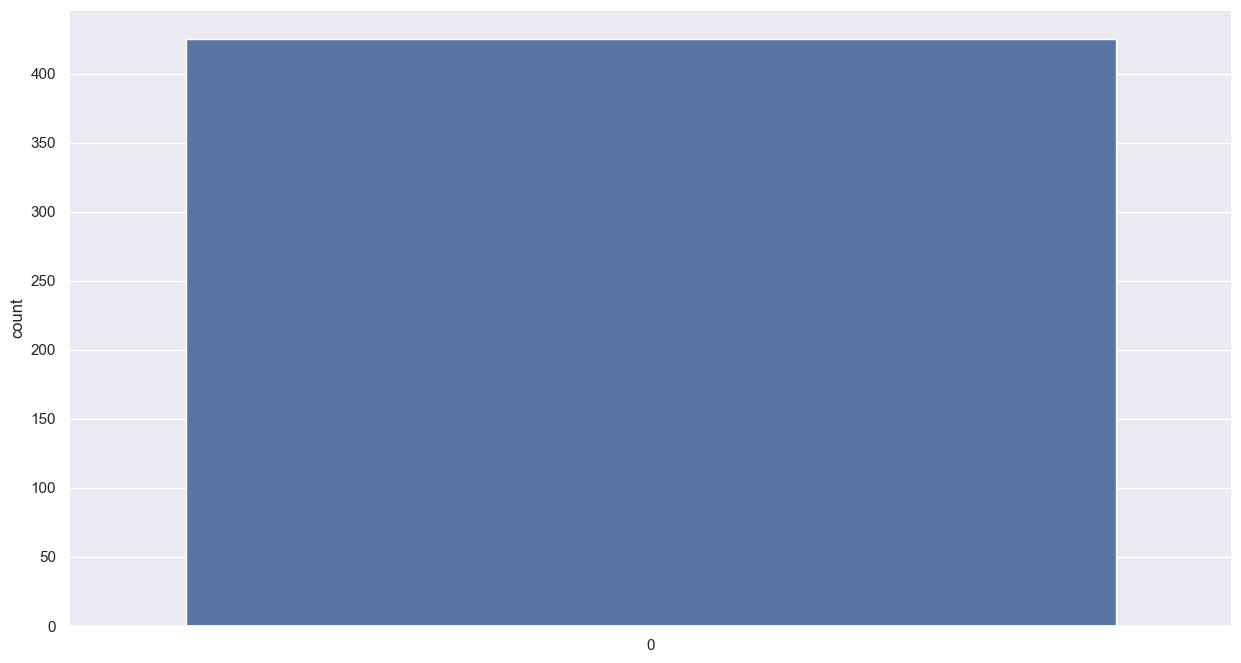

In [57]:
sns.set(rc={'figure.figsize':(15,8)})
sns.countplot(df['gender'])

In [58]:
fraud = df[df['gender']==1]
valid = df[df['gender']==0]

print("Normal transactions :", len(valid))
print("Fraud  transactions :", len(fraud))

Normal transactions : 22
Fraud  transactions : 403


In [59]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

df['gender']= label_encoder.fit_transform(df['gender'])

In [62]:
columns = df.columns.tolist()
columns = [c for c in columns if c not in ['gender']]
X = df[columns]
Y = df['gender']

from sklearn.model_selection import train_test_split



X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = .20)
X_train.pop('date')
X_test.pop('date')
X_train.pop('critical risk')
X_test.pop('critical risk')
X_train.pop('description')
X_test.pop('description')

397    In moments when the 02 collaborators carried o...
126    Being 10:50 am. Approximately, in the workshop...
45     At a time when two assistants were carrying a ...
326    During the maintenance of the peristaltic pump...
214    When cutting the vegetation to open the bite, ...
                             ...                        
14     Due to the accumulation of Waelz on the convey...
333    At the conclusion of the unloading of ore with...
231    At the intersection of level 3970 - main road ...
267    At 18:40 hours, in moments when Mr. Claudio ti...
52     In circumstances that two workers of the compa...
Name: description, Length: 85, dtype: object

In [63]:
clf = IsolationForest(max_samples=len(X_train))

clf.fit(X_train)

y_pred = clf.predict(X_test)

In [64]:
y_pred[y_pred==1] = 0
y_pred[y_pred==-1] = 1

In [65]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_pred,Y_test))

0.36470588235294116


In [66]:
fig = px.scatter([i for i in range(len(df['accident level']))], y=df['potential accident level'])
fig.show()

In [67]:
df_numeric=df.select_dtypes(include=[np.number])
numeric_cols=df_numeric.columns.values
print(numeric_cols)

['unnamed: 0' 'countries' 'city' 'industry sector' 'accident level'
 'potential accident level' 'gender' 'employee or third party']


In [68]:
from sklearn.ensemble import IsolationForest

#инициализация Isolation Forest
isolation_model = IsolationForest(contamination = 0.003)

#тренировка модели
isolation_model.fit(df_numeric)

#создание предсказаний
IF_predictions = isolation_model.predict(df_numeric)

C:\Users\grias\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:409: UserWarning:

X does not have valid feature names, but IsolationForest was fitted with feature names



In [69]:
#добавление аномалий в датасет
df['anomalies'] = IF_predictions
anomalies = df.query('anomalies == -1')

import plotly.graph_objects as go

#строю график для выбросов
normal = go.Scatter(x=df.index.astype(str),y=df['accident level'],name="df",mode='markers')
outlier = go.Scatter(x=anomalies.index.astype(str),y=anomalies['accident level'],name="Anomalies",mode='markers',
                marker=dict(color='red', size=6,
                            line=dict(color='red', width=1)))

# обозначения графика
layout = go.Layout(title="Isolation Forest",yaxis_title='accident level',xaxis_title='x-axis',)

#строю график
data = [normal, outlier]
fig = go.Figure(data=data, layout=layout)
fig.show()

In [70]:
print(numeric_cols)
df.columns

['unnamed: 0' 'countries' 'city' 'industry sector' 'accident level'
 'potential accident level' 'gender' 'employee or third party']


Index(['date', 'unnamed: 0', 'countries', 'city', 'industry sector',
       'accident level', 'potential accident level', 'gender',
       'employee or third party', 'critical risk', 'description', 'anomalies'],
      dtype='object')

In [73]:
data = df.copy()

data.drop('countries', axis=1, inplace=True)
data.drop('city', axis=1, inplace=True)
data.drop('industry sector', axis=1, inplace=True)
data.drop('gender', axis=1, inplace=True)
data.drop('employee or third party', axis=1, inplace=True)
data.drop('date', axis=1, inplace=True)
data.drop('anomalies', axis=1, inplace=True)
data.drop('critical risk', axis=1, inplace=True)
data.drop('description', axis=1, inplace=True)

data.head()

,unnamed: 0,accident level,potential accident level
0,0,0,3
1,1,0,3
2,2,0,2
3,3,0,0
4,4,3,3


In [74]:
#инициализация Isolation Forest
isolation_model1= IsolationForest(contamination=0.003)

#тренировка модели
isolation_model1.fit(data)

#создание предсказаний
IF_predictions1 = isolation_model1.predict(data)

C:\Users\grias\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:409: UserWarning:

X does not have valid feature names, but IsolationForest was fitted with feature names



In [75]:
# добавление аномалий в набор данных
data['anomalies'] = IF_predictions1
anomalies1 = data.query('anomalies == -1')

#строю график для выбросов
normal = go.Scatter(x=data.index.astype(str),y=data['accident level'],name="Normal data", mode='markers')
outlier = go.Scatter(x=anomalies1.index.astype(str), y=anomalies1['accident level'], name="Anomalies", mode='markers',
                        marker=dict(color='red', size=5,
                            line=dict(color='red', width=1)))

# обозначения графика
layout = go.Layout(title="Isolation Forest", yaxis_title='accident level',xaxis_title='x-axis',)

#строю график
Data = [normal, outlier]
fig = go.Figure(data=Data, layout=layout)
fig.show()